In [1]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
model.score(X_test, y_test)

0.452606602161738

Text(0, 0.5, 'Predictions')

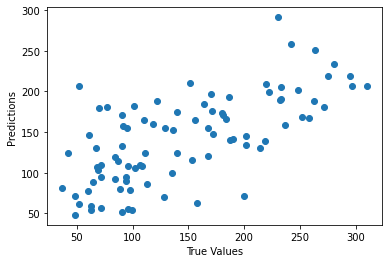

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# Feature Scaling

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [11]:
y = data['Value']

In [12]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [13]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

### MinMaxScaler

In [15]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [16]:
X_train_mms = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [17]:
X_train_mms

,Age,Overall,Potential,Jersey Number
0,0.413793,0.395833,0.361702,0.010204
1,0.448276,0.604167,0.574468,0.316327
2,0.172414,0.604167,0.744681,0.102041
3,0.310345,0.562500,0.617021,0.204082
4,0.482759,0.520833,0.489362,0.153061
...,...,...,...,...
14320,0.137931,0.437500,0.723404,0.336735
14321,0.068966,0.187500,0.382979,0.142857
14322,0.103448,0.312500,0.553191,0.336735
14323,0.344828,0.395833,0.361702,0.153061


In [18]:
X_test_mms = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [19]:
X_test_mms

,Age,Overall,Potential,Jersey Number
0,0.068966,0.229167,0.595745,0.428571
1,0.275862,0.416667,0.489362,0.163265
2,0.206897,0.354167,0.404255,0.102041
3,0.275862,0.729167,0.808511,0.224490
4,0.413793,0.312500,0.276596,0.122449
...,...,...,...,...
3577,0.103448,0.375000,0.638298,0.255102
3578,0.275862,0.354167,0.468085,0.173469
3579,0.482759,0.625000,0.595745,0.061224
3580,0.448276,0.479167,0.446809,0.081633


#### Implement your own MinMaxScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [1]:
class MyMinMaxScaler:
    
    def __init__(self, min_vals=None, max_vals=None):
        self._min_vals = min_vals
        self._max_vals = max_vals

    def fit(self, X):
        self._min_vals = np.array(X.min())
        self._max_vals = np.array(X.max())
        return self
        
    def transform(self, X):
        tmp = []
        names = X.columns
        for i in range(X.shape[1]):
            tmp.append((X[X.columns[i]] - self._min_vals[i])/(self._max_vals[i]-self._min_vals[i]))
        return pd.DataFrame(np.array(tmp).T, columns=names)

In [2]:
norm_mmms = MyMinMaxScaler().fit(X_train)
X_train_mmms = norm_mmms.transform(X_train)
X_train_mmms

NameError: name 'X_train' is not defined

In [22]:
X_test_mmms = norm_mmms.transform(X_test)
X_test_mmms

,Age,Overall,Potential,Jersey Number
0,0.068966,0.229167,0.595745,0.428571
1,0.275862,0.416667,0.489362,0.163265
2,0.206897,0.354167,0.404255,0.102041
3,0.275862,0.729167,0.808511,0.224490
4,0.413793,0.312500,0.276596,0.122449
...,...,...,...,...
3577,0.103448,0.375000,0.638298,0.255102
3578,0.275862,0.354167,0.468085,0.173469
3579,0.482759,0.625000,0.595745,0.061224
3580,0.448276,0.479167,0.446809,0.081633


### Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [25]:
X_train_ss  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train_ss

,Age,Overall,Potential,Jersey Number
0,0.629351,-0.179033,-1.037805,-1.100816
1,0.844225,1.263889,0.592264,0.763206
2,-0.874765,1.263889,1.896319,-0.541609
3,-0.015270,0.975304,0.918278,0.079731
4,1.059099,0.686720,-0.059764,-0.230939
...,...,...,...,...
14320,-1.089638,0.109551,1.733313,0.887474
14321,-1.519386,-1.621955,-0.874798,-0.293073
14322,-1.304512,-0.756202,0.429257,0.887474
14323,0.199604,-0.179033,-1.037805,-0.230939


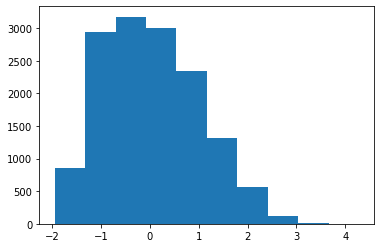

In [26]:
plt.hist(X_train_ss.Age)
plt.show()

In [27]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-1.519386,-1.333371,0.755271,1.446680
1,-0.230144,-0.034741,-0.059764,-0.168805
2,-0.659891,-0.467617,-0.711791,-0.541609
3,-0.230144,2.129642,2.385340,0.203999
4,0.629351,-0.756202,-1.689833,-0.417341
...,...,...,...,...
3577,-1.304512,-0.323325,1.081285,0.390401
3578,-0.230144,-0.467617,-0.222770,-0.106671
3579,1.059099,1.408181,0.755271,-0.790145
3580,0.844225,0.398136,-0.385777,-0.665877


#### Implement your own StandardScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [28]:
class MyStandardScaler:
    
    def __init__(self, col_mean=None, col_std=None):
        self._col_mean = col_mean
        self._col_std = col_std

    def fit(self, X):
        self._col_mean = np.array(X.mean())
        self._col_std = np.array(X.std())
        return self
        
    def transform(self, X):
        tmp = []
        names = X.columns
        for i in range(X.shape[1]):
            tmp.append((X[X.columns[i]] - self._col_mean[i])/self._col_std[i])
        return pd.DataFrame(np.array(tmp).T, columns=names)

In [29]:
norm_mss = MyStandardScaler().fit(X_train)
X_train_mss = norm_mss.transform(X_train)
X_train_mss

,Age,Overall,Potential,Jersey Number
0,0.629329,-0.179027,-1.037769,-1.100777
1,0.844195,1.263845,0.592243,0.763179
2,-0.874734,1.263845,1.896253,-0.541590
3,-0.015269,0.975270,0.918246,0.079728
4,1.059062,0.686696,-0.059761,-0.230931
...,...,...,...,...
14320,-1.089600,0.109547,1.733252,0.887443
14321,-1.519333,-1.621898,-0.874768,-0.293063
14322,-1.304467,-0.756175,0.429242,0.887443
14323,0.199597,-0.179027,-1.037769,-0.230931


In [30]:
norm_mss.transform(X_test)

,Age,Overall,Potential,Jersey Number
0,-1.519333,-1.333324,0.755245,1.446629
1,-0.230136,-0.034740,-0.059761,-0.168799
2,-0.659868,-0.467601,-0.711766,-0.541590
3,-0.230136,2.129568,2.385257,0.203992
4,0.629329,-0.756175,-1.689774,-0.417327
...,...,...,...,...
3577,-1.304467,-0.323314,1.081247,0.390388
3578,-0.230136,-0.467601,-0.222763,-0.106667
3579,1.059062,1.408132,0.755245,-0.790118
3580,0.844195,0.398122,-0.385764,-0.665854


# tasks

###### try applying this scalers to any dataset and check the regression results

In [31]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [33]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [34]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.816667,1.0,0.405172,0.690141,0.544503,0.524900,0.220779,0.423131,0.590940,0.500000
1,0.450000,1.0,0.284483,0.323944,0.335079,0.406375,0.103896,0.564175,0.486602,0.575758
2,0.516667,0.0,0.556034,0.859155,0.356021,0.315737,0.337662,0.282087,0.551161,0.454545
3,0.366667,0.0,0.215517,0.338028,0.198953,0.181275,0.467532,0.141044,0.293531,0.030303
4,0.383333,0.0,0.094828,0.126761,0.267016,0.197211,0.571429,0.000000,0.342589,0.348485
...,...,...,...,...,...,...,...,...,...,...
348,0.050000,0.0,0.051724,0.281690,0.240838,0.256972,0.389610,0.141044,0.256548,0.196970
349,0.516667,1.0,0.478448,0.802817,0.272251,0.217131,0.415584,0.141044,0.518828,0.560606
350,0.633333,0.0,0.275862,0.436620,0.397906,0.273904,0.636364,0.141044,0.443568,0.500000
351,0.433333,0.0,0.262931,0.295775,0.350785,0.382470,0.298701,0.282087,0.337464,0.363636


In [35]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [36]:
model.score(X_test, y_test)

0.45260660216173787

In [37]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [39]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [40]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,1.498365,1.061370,0.219902,1.138877,0.728473,1.055893,-0.824451,0.711038,0.547560,-0.061449
1,-0.228858,1.061370,-0.419366,-0.710597,-0.424929,0.272425,-1.529791,1.484286,-0.019776,0.367236
2,0.085182,-0.942179,1.018987,1.992480,-0.309589,-0.326699,-0.119111,-0.062210,0.331260,-0.318660
3,-0.621409,-0.942179,-0.784662,-0.639464,-1.174640,-1.215508,0.664600,-0.835458,-1.069599,-2.719299
4,-0.542899,-0.942179,-1.423930,-1.706468,-0.799784,-1.110167,1.291569,-1.608706,-0.802848,-0.918820
...,...,...,...,...,...,...,...,...,...,...
348,-2.113102,-0.942179,-1.652240,-0.923998,-0.943960,-0.715141,0.194374,-0.835458,-1.270691,-1.776191
349,0.085182,1.061370,0.608029,1.707946,-0.770949,-0.978492,0.351116,-0.835458,0.155448,0.281499
350,0.634754,-0.942179,-0.465028,-0.141528,-0.078908,-0.603217,1.683425,-0.835458,-0.253776,-0.061449
351,-0.307368,-0.942179,-0.533521,-0.852865,-0.338424,0.114414,-0.354224,-0.062210,-0.830712,-0.833083


In [41]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [42]:
model.score(X_test, y_test)

0.4526066021617381

In [43]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.853256984914395
Train RMSE: 53.55881425327268


In [44]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [45]:
model.score(X_test, y_test)

-231.9688222115084

In [46]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 1110.992426954278
Train RMSE: 53.55881425327268


In [47]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [49]:
norm = StandardScaler().fit(X_train)

In [50]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [51]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [52]:
model.score(X_test, y_test)

0.4499045750576577

In [53]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979
